In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
X = pd.read_csv('Mall_Customers.csv')

In [3]:
X.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = X.filter(['Annual Income (k$)', 'Spending Score (1-100)'], axis = 1)

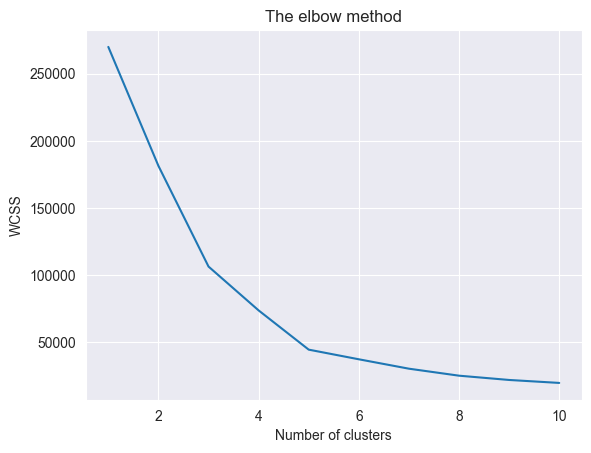

In [10]:
wcss = []

for i in range (1, 11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range (1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

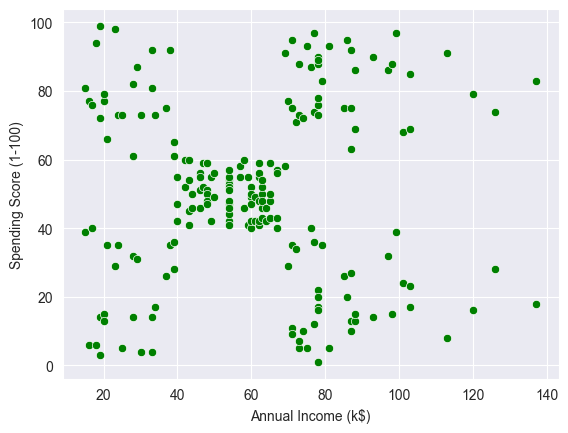

In [6]:
sns.scatterplot(data = X, x="Annual Income (k$)", y = "Spending Score (1-100)", c = ["green"])

In [7]:
model = KMeans(n_clusters= 5)
model.fit(X)

KMeans(n_clusters=5)

In [8]:
print(model.cluster_centers_)

[[25.72727273 79.36363636]
 [87.75       17.58333333]
 [86.53846154 82.12820513]
 [55.0875     49.7125    ]
 [26.30434783 20.91304348]]


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

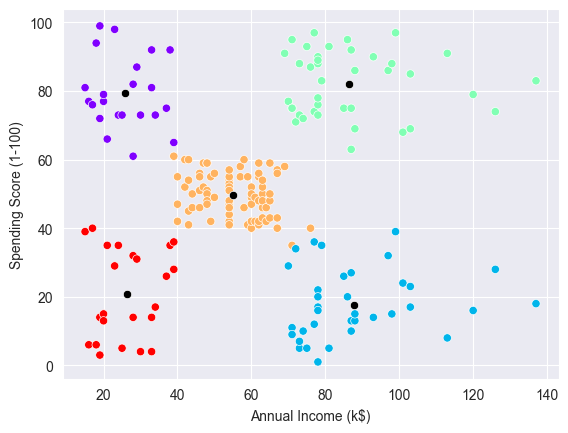

In [9]:
sns.scatterplot(data = X, x="Annual Income (k$)", y = "Spending Score (1-100)", c = model.labels_, cmap = 'rainbow')
sns.scatterplot(x=model.cluster_centers_[:, 0], y =model.cluster_centers_[:, 1], c = ['black'])